In [1]:
import gymnasium as gym
from scripts.DQN_Optimizer import DQN_Optimizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
env = gym.make("CartPole-v1")

In [3]:
#####################################
## TEST LEARNING RATES/ Batch size
#######################################

param_dict = {
                "batch_size" : 200,
                "gamma" : 0.99,
                "eps_start" : 0.99,
                "eps_end" : 0.1,
                "eps_decay" : 0.95,
                "learning_rate" : 1e-3,
                "train_episodes" : 500,
                "test_episodes" : 20,
                "steps_between_updates": 50
                }

In [4]:
seed_rewards = []
all_episode_rewards = []
all_epsilons = []
modif_params = [True, False]
nb_seeds = 2
for seed in range(nb_seeds):
    dqn_opt = DQN_Optimizer(env = env, replay_memory_size= 100000, param_dict=param_dict)
    dqn_opt.set_optimizer('adam')
    seed_rewards.append(dqn_opt.run_optimization(fill_rp_memory=modif_params[seed]))
    all_episode_rewards.append(dqn_opt.episode_cumulative_reward)
    all_epsilons.append(dqn_opt.epsilons)

pytorch will run on cpu
The specified number of episodes might be big for optimization on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.10: 100%|██████████| 500/500 [48:26<00:00,  5.81s/it]  


Optimization complete
pytorch will run on cpu
The specified number of episodes might be big for optimization on cpu


Current train episode eps : 0.10: 100%|██████████| 500/500 [1:19:59<00:00,  9.60s/it]

Optimization complete


In [5]:
def plot_rewards(seed_rewards, individual = False):

    test_rewards = []
    test_episodes = []
    seeds = []



    for seed, rewards in enumerate(seed_rewards):
        for episode_idx, reward in enumerate(rewards):
            test_rewards.append(reward)
            test_episodes.append(episode_idx*10)
            seeds.append(seed)

    df = pd.DataFrame({
        'Episode': test_episodes,
        'Test_rewards': test_rewards,
        'Seed': seeds
    })
    df.to_csv("rewards_2kepisodes.csv")
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    if individual:
        sns.lineplot(data=df, x='Episode', y='Test_rewards', hue = "Seed", legend="full")
    else:
        sns.lineplot(data=df, x='Episode', y='Test_rewards')
        
    plt.title('Test rewards over episodes')
    plt.xlabel('Episode')
    plt.ylabel('Test_rewards')
    plt.show()

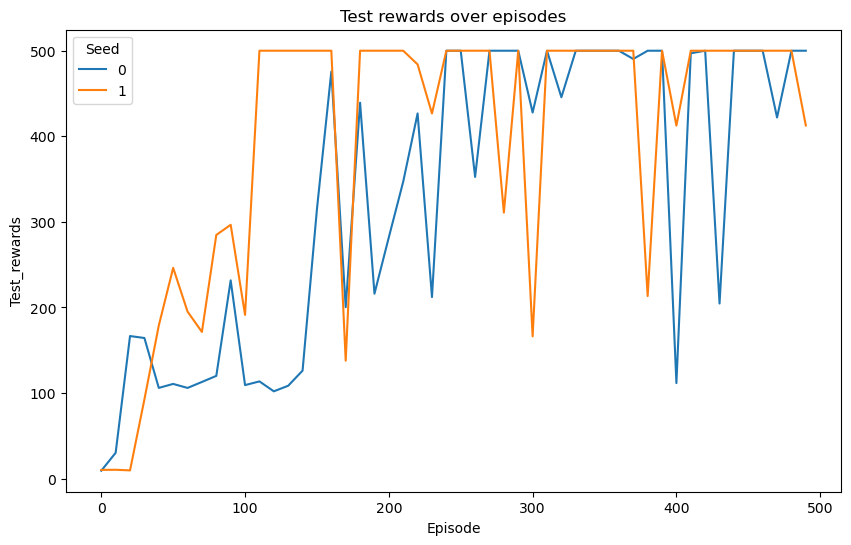

In [6]:
plot_rewards(seed_rewards, individual=True)

In [7]:
np.save(file = "all_episode_rewards_3seeds_2kep_train" , arr = np.array(all_episode_rewards), allow_pickle = True)
np.save(file = "all_epsilons_3seeds_2kep_train" , arr = np.array(all_epsilons), allow_pickle = True)